In [1]:
import pandas as pd
from pandas_datareader import data as pandas_data, wb as pandas_wb
import numpy as np
import datetime
import matplotlib.pyplot as plt

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 4)

%matplotlib inline

In [2]:
# Load the data from the CSV files
stocks_us_adjClose = pd.read_csv('stocks-us-adjClose.csv', header=0)
stocks_us_adjHigh = pd.read_csv('stocks-us-adjHigh.csv', header=0)
stocks_us_adjLow = pd.read_csv('stocks-us-adjLow.csv', header=0)
stocks_us_adjOpen = pd.read_csv('stocks-us-adjOpen.csv', header=0)
stocks_us_Volume = pd.read_csv('stocks-us-Volume.csv', header=0)
company_info = pd.read_csv('Company_information.csv')

In [3]:
stocks_us_adjClose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Columns: 711 entries, compiled from Yahoo! Finance data by Matt Borthwick to BTU
dtypes: float64(710), object(1)
memory usage: 65.3+ MB


In [4]:
stocks_us_adjClose.describe()

               ED          DD         CVX    ...         LMHA        UA  \
count  12032.0000  12031.0000  12032.0000    ...     369.0000  370.0000   
mean      16.2214      4.6580     25.8388    ...      25.8443   27.0226   
std       19.0883     16.8425     32.4106    ...       0.7058    8.6019   
min        0.0927      0.0004      0.4435    ...      23.4006   15.1000   
25%        0.9805      0.0009      2.3234    ...      25.3416   18.6575   
50%        8.5861      0.0040      9.6015    ...      25.9919   25.5150   
75%       25.6080      0.0142     38.2216    ...      26.4057   34.7925   
max       85.5300     85.1069    117.7906    ...      27.1446   45.4081   

            BTU  
count  111.0000  
mean    26.0995  
std      2.0536  
min     23.0100  
25%     24.2200  
50%     25.7500  
75%     27.8600  
max     31.0000  

[8 rows x 710 columns]

In [5]:
stocks_us_adjClose = stocks_us_adjClose.rename(columns={'compiled from Yahoo! Finance data by Matt Borthwick': 'Date'})
stocks_us_adjHigh = stocks_us_adjHigh.rename(columns={'compiled from Yahoo! Finance data by Matt Borthwick': 'Date'})
stocks_us_adjLow = stocks_us_adjLow.rename(columns={'compiled from Yahoo! Finance data by Matt Borthwick': 'Date'})
stocks_us_adjOpen = stocks_us_adjOpen.rename(columns={'compiled from Yahoo! Finance data by Matt Borthwick': 'Date'})
stocks_us_Volume = stocks_us_Volume.rename(columns={'compiled from Yahoo! Finance data by Matt Borthwick': 'Date'})
company_info = company_info.rename(columns={'Company.Name': 'Name'})
company_info = company_info.rename(columns={'Symbol': 'Ticker'})

In [6]:
# Create a dictionary of stocks.
stocks = {}
dates = stocks_us_adjClose['Date'].values
tickers = stocks_us_adjClose.columns[1:]
for ticker in tickers:
    c_i = company_info[company_info.Ticker == ticker]
    df = pd.DataFrame(data={'Ticker': [ticker] * dates.shape[0], 'Open': stocks_us_adjOpen[ticker].values, 
                            'High': stocks_us_adjHigh[ticker].values, 'Low': stocks_us_adjLow[ticker].values, 
                            'Close': stocks_us_adjClose[ticker].values, 'Volume': stocks_us_Volume[ticker].values,
                            'Name': c_i.Name, 'Sector': c_i.Sector, 'Industry': c_i.Industry},
                      index=dates)
    df.index.rename('Date', inplace=True)
    df.index = pd.to_datetime(df.index)
    stocks[ticker] = df

In [7]:
# Given the dictionary of data frames, pivots a given column into values with column names being the stock symbols.
def pivotTickersToColumns(raw, column):
    items = []
    # loop through all dictionary keys
    for key in raw:
        # get the data for the key
        data = raw[key]
        # extract just the column specified
        subset = data[['Ticker', column]]
        # add to items
        items.append(subset)
    # concatenate all the items
    combined = pd.concat(items)
    # reset the index
    ri = combined.reset_index()
    # return the pivot
    return ri.pivot('Date', 'Ticker', column)

In [8]:
# Pivot the Close data into columns.
close_px = pivotTickersToColumns(stocks, 'Close')
close_px.index = pd.to_datetime(close_px.index)
close_px[:5]

Ticker      AAON  AAWW  ABRN  ...   ZAYO  ZBK  ZIXI
Date                          ...                  
1970-01-02   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-01-05   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-01-06   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-01-07   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-01-08   NaN   NaN   NaN  ...    NaN  NaN   NaN

[5 rows x 710 columns]

In [9]:
# Pivot the Volume data into columns.
volumes = pivotTickersToColumns(stocks, 'Volume')
volumes.tail()

Ticker          AAON      AAWW     ABRN    ...          ZAYO     ZBK  \
Date                                       ...                         
2017-09-01   89900.0  297800.0   5400.0    ...      926700.0  1500.0   
2017-09-05  102600.0  329600.0   4900.0    ...     1872100.0  1700.0   
2017-09-06  107800.0  474700.0   7500.0    ...     1898700.0     0.0   
2017-09-07  126800.0  237800.0   6400.0    ...     2539300.0   600.0   
2017-09-08  228300.0  149900.0  16600.0    ...     1502300.0   200.0   

Ticker          ZIXI  
Date                  
2017-09-01  109700.0  
2017-09-05  146600.0  
2017-09-06  125600.0  
2017-09-07   99900.0  
2017-09-08  141700.0  

[5 rows x 710 columns]

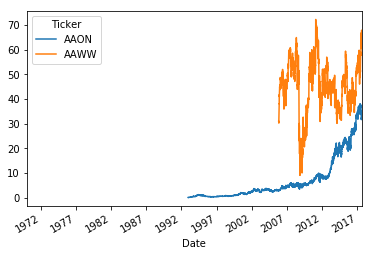

In [10]:
# Plot MSFT vs AAPL on the same chart.
close_px[['AAON', 'AAWW']].plot()

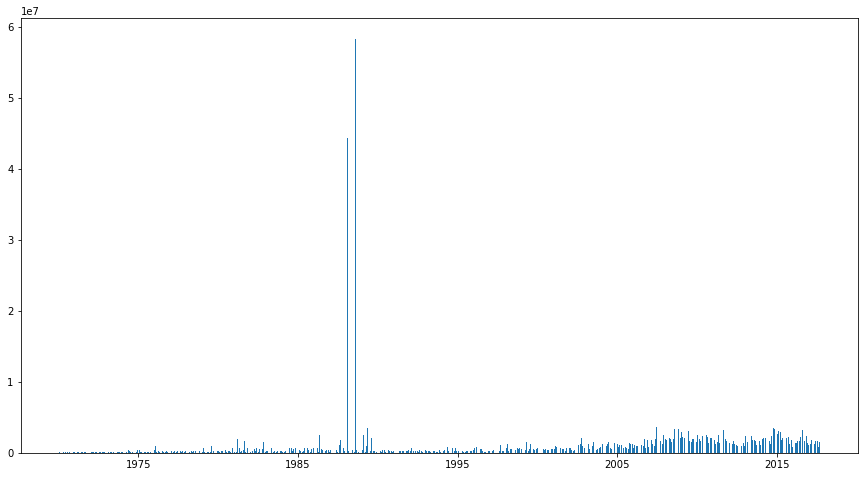

In [11]:
# Plot the volume for ED.
msftV = volumes[['ED']]
plt.bar(msftV.index, msftV['ED'])
plt.gcf().set_size_inches(15,8)

In [12]:
mean_close = close_px.mean(axis=1)
mean_volume = volumes.mean(axis=1)

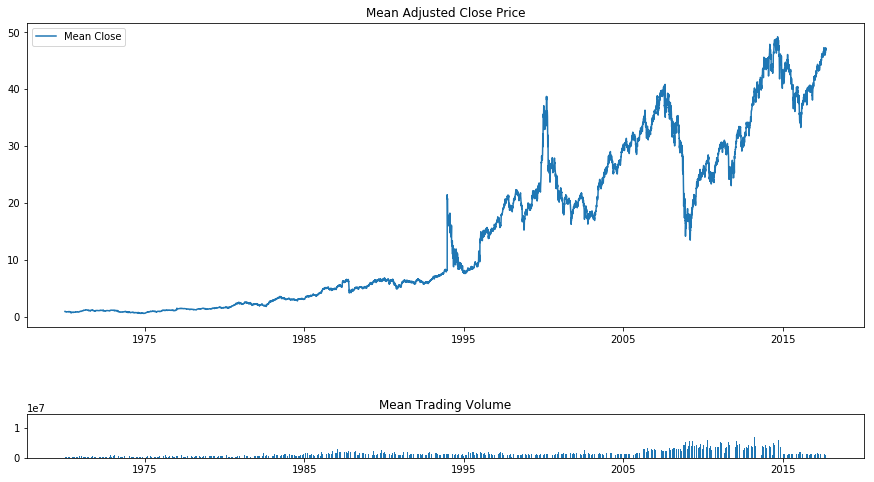

In [13]:
# Draw the price history on the top and the volume along the bottom.
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(mean_close.index, mean_close, label='Mean Close')
plt.title('Mean Adjusted Close Price')
plt.legend(loc=2)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(mean_volume.index, mean_volume)
plt.title('Mean Trading Volume')
plt.subplots_adjust(hspace=2)
plt.gcf().set_size_inches(15,8)

In [14]:
# Calculate daily percentage change.
daily_pc = close_px / close_px.shift(1) - 1
daily_pc[:5]

Ticker      AAON  AAWW  ABRN  ...   ZAYO  ZBK  ZIXI
Date                          ...                  
1970-01-02   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-01-05   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-01-06   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-01-07   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-01-08   NaN   NaN   NaN  ...    NaN  NaN   NaN

[5 rows x 710 columns]

In [15]:
# Calculate daily cumulative return.
daily_cr = (1 + daily_pc).cumprod()
daily_cr[:5]

Ticker      AAON  AAWW  ABRN  ...   ZAYO  ZBK  ZIXI
Date                          ...                  
1970-01-02   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-01-05   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-01-06   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-01-07   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-01-08   NaN   NaN   NaN  ...    NaN  NaN   NaN

[5 rows x 710 columns]

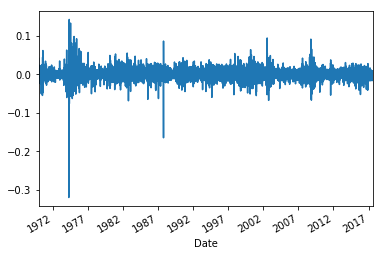

In [16]:
# Plot daily percentage change for ED.
daily_pc['ED'].plot()

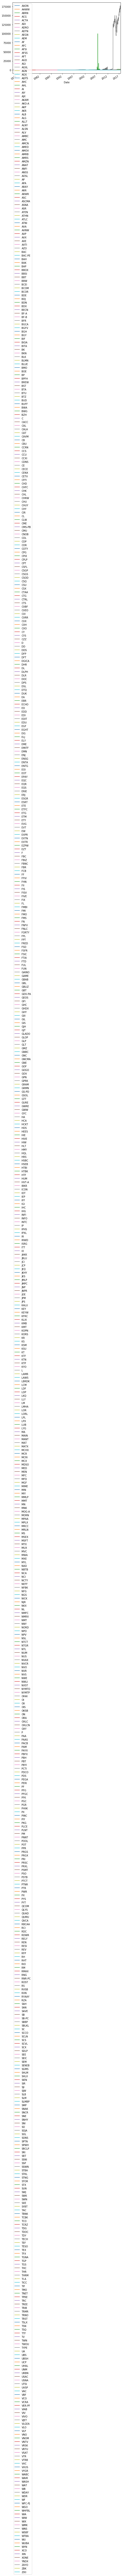

In [17]:
# Plot all the cumulative returns to get an idea of the relative performance of all the stocks.
daily_cr.plot(figsize=(8,6))
plt.legend(loc=2)

In [18]:
# Resample to end of month and forward fill values.
monthly = close_px.asfreq('M', method="ffill")
monthly[:5]

Ticker      AAON  AAWW  ABRN  ...   ZAYO  ZBK  ZIXI
Date                          ...                  
1970-01-31   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-02-28   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-03-31   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-04-30   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-05-31   NaN   NaN   NaN  ...    NaN  NaN   NaN

[5 rows x 710 columns]

In [19]:
# Calculate the monthly percentage changes.
monthly_pc = monthly / monthly.shift(1) - 1
monthly_pc[:5]

Ticker      AAON  AAWW  ABRN  ...   ZAYO  ZBK  ZIXI
Date                          ...                  
1970-01-31   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-02-28   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-03-31   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-04-30   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-05-31   NaN   NaN   NaN  ...    NaN  NaN   NaN

[5 rows x 710 columns]

In [20]:
# Calculate monthly cumulative return.
monthly_cr = (1 + monthly_pc).cumprod()
monthly_cr[:5]

Ticker      AAON  AAWW  ABRN  ...   ZAYO  ZBK  ZIXI
Date                          ...                  
1970-01-31   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-02-28   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-03-31   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-04-30   NaN   NaN   NaN  ...    NaN  NaN   NaN
1970-05-31   NaN   NaN   NaN  ...    NaN  NaN   NaN

[5 rows x 710 columns]

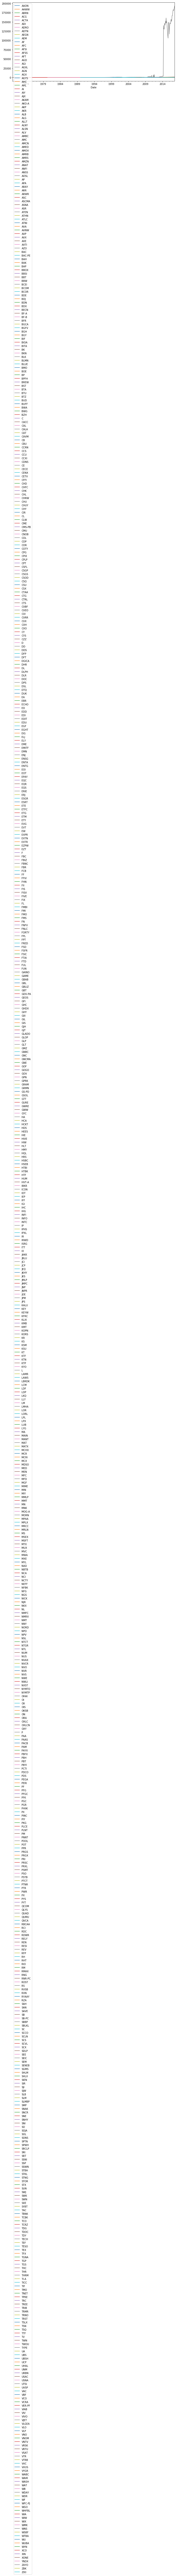

In [21]:
# Plot the monthly cumulative returns.
monthly_cr.plot(figsize=(12,6))
plt.legend(loc=2)

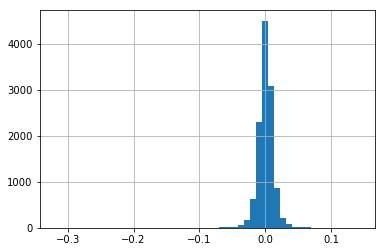

In [22]:
# Histogram of the daily percentage change for ED.
ed = daily_pc['ED']
ed.hist(bins=50)

In [23]:
# Descriptive statistics of the percentage changes.
ed.describe()

count    12031.0000
mean         0.0006
std          0.0128
min         -0.3194
25%         -0.0054
50%          0.0000
75%          0.0063
max          0.1429
Name: ED, dtype: float64

e:\users\thanos\miniconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  after removing the cwd from sys.path.
e:\users\thanos\miniconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=90,center=False).mean()
  """


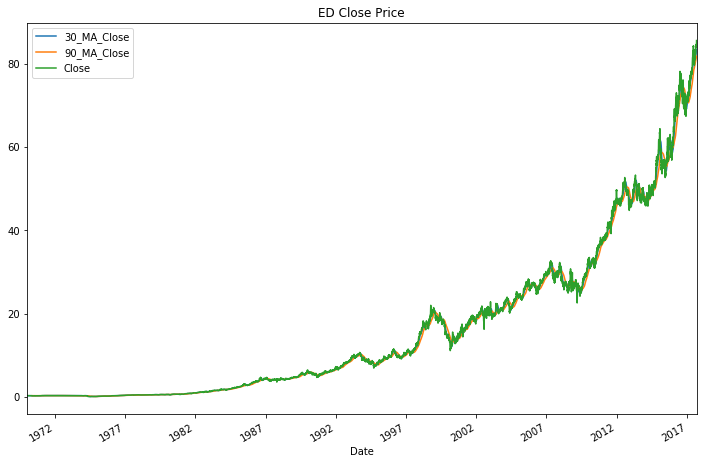

In [24]:
# Extract just ED close.
ed_close = close_px[['ED']]['ED']
# calculate the 30 and 90 day rolling means
ma_30 = pd.stats.moments.rolling_mean(ed_close, 30)
ma_90 = pd.stats.moments.rolling_mean(ed_close, 90)
result = pd.DataFrame({'Close': ed_close,
    '30_MA_Close': ma_30,
    '90_MA_Close': ma_90})
# Plot all the series against each other.
result.plot(title="ED Close Price")
plt.gcf().set_size_inches(12,8)

In [25]:
# calculate the correlation between all the stocks relative
# to daily percentage change
corrs = daily_pc.corr()
corrs

Ticker    AAON    AAWW    ABRN   ...      ZAYO     ZBK    ZIXI
Ticker                           ...                          
AAON    1.0000  0.4121  0.0282   ...    0.2555  0.0581  0.1283
AAWW    0.4121  1.0000  0.0250   ...    0.1961  0.0473  0.3058
ABRN    0.0282  0.0250  1.0000   ...    0.1076  0.0348  0.0295
ACG     0.0899 -0.0659     NaN   ...       NaN  0.0054  0.0652
ACTA    0.2556  0.4225  0.0743   ...    0.2230  0.0727  0.2339
...        ...     ...     ...   ...       ...     ...     ...
XONE    0.2647  0.1916  0.0511   ...    0.2045  0.0480  0.0947
YNDX    0.2874  0.2925  0.0876   ...    0.2080  0.0811  0.2325
ZAYO    0.2555  0.1961  0.1076   ...    1.0000  0.1135  0.1469
ZBK     0.0581  0.0473  0.0348   ...    0.1135  1.0000  0.0175
ZIXI    0.1283  0.3058  0.0295   ...    0.1469  0.0175  1.0000

[710 rows x 710 columns]

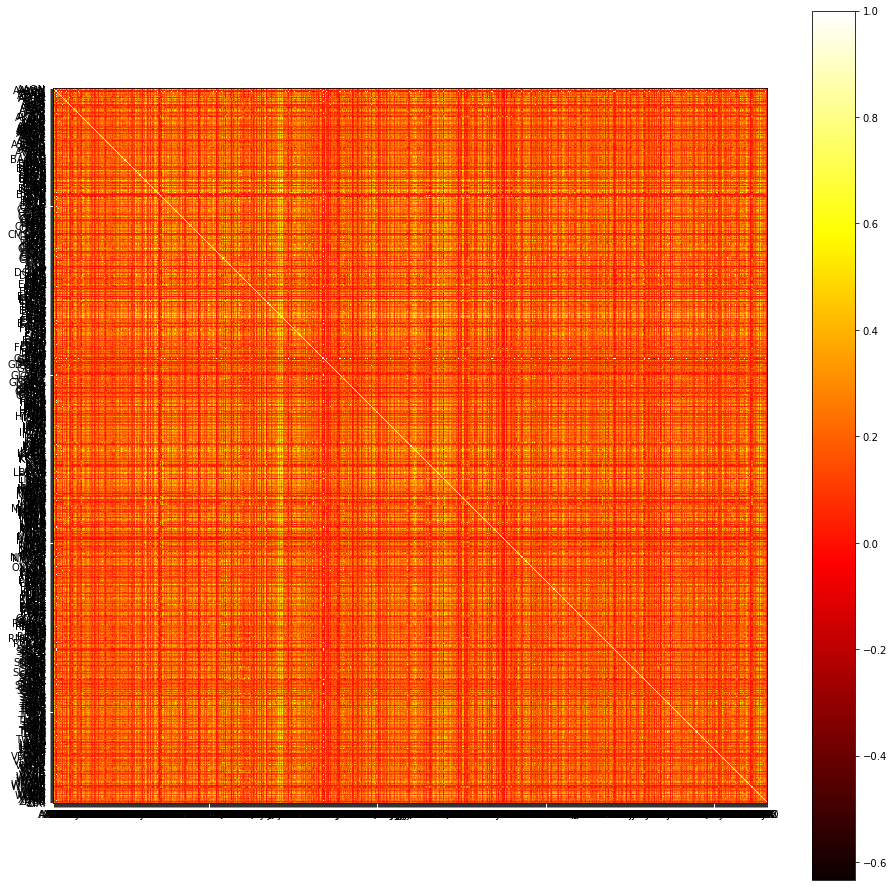

In [26]:
# plot a heatmap of the correlations
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(16, 16)

e:\users\thanos\miniconda2\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=75,center=False).std()
  after removing the cwd from sys.path.


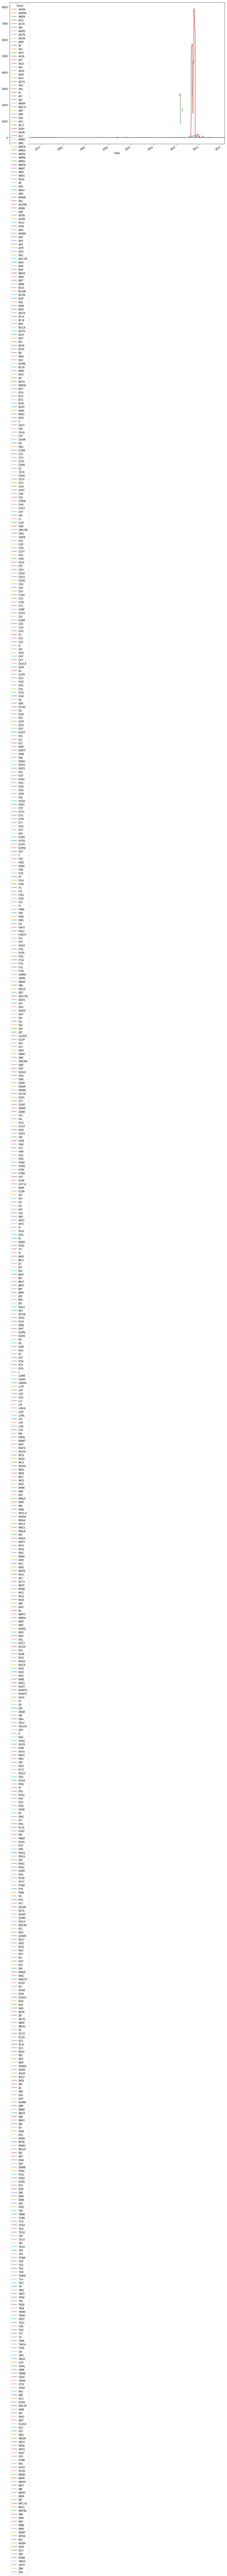

In [28]:
# 75 period minimum
min_periods = 75
# calculate the volatility
vol = pd.stats.moments.rolling_std(daily_pc, min_periods) * np.sqrt(min_periods)
# plot it
vol.plot(figsize=(16, 12))

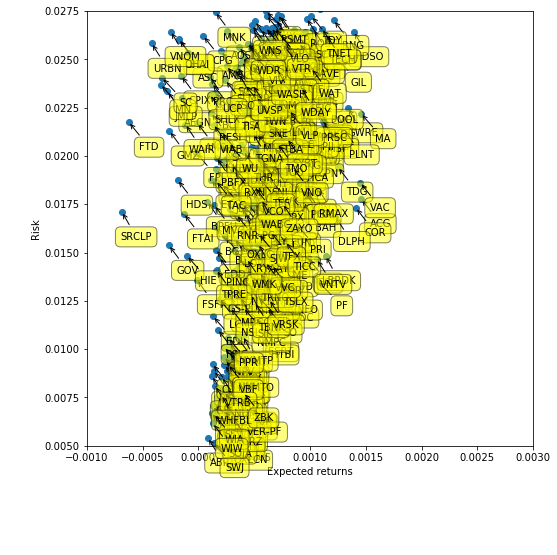

In [29]:
# Generate a scatter of the mean versus std of daily % change.
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(daily_pc.columns,
                        daily_pc.mean(),
                        daily_pc.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (30, -30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5',
        fc = 'yellow',
        alpha = 0.5),
        arrowprops = dict(arrowstyle = '->',
        connectionstyle = 'arc3,rad=0'))
plt.xlim(-0.001, 0.003)
plt.ylim(0.005, 0.0275)
# set size
plt.gcf().set_size_inches(8,8)